In [1]:
import argparse
from io import BytesIO
import base64
from dataset.vcoco import build
from tqdm import tqdm

/opt/conda/envs/ofa/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parser = argparse.ArgumentParser(description="vcoco")
parser.add_argument('--num_queries', default=100, type=int, help="Number of query slots")
parser.add_argument("--data_path", default="/data/dataset/v-coco/", type=str)
args = parser.parse_args([])

In [160]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
def to_tsv(mode='train'):
    dataset = build(mode, args)
    actions = np.array(dataset.get_actions())
    print(actions)
    COCO_CLASSES = dataset.COCO_CLASSES
    # COCO_CLASSES.append('no_object')
    print(mode, len(dataset))
    targets = ""
    for i, (img, anno) in enumerate(tqdm(dataset)):
        if i != 3:
            continue
        target = f"{i+1}\t"

        img = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)
        
        print(anno.keys())
        boxes = anno["pair_boxes"]
        targets = anno["pair_targets"]
        hois = anno["pair_actions"]
        for box, target, hoi in zip(boxes, targets, hois):
            if target == -1:
                continue
            human_box = box[:4]
            obj_box = box[4:]
            
            action = [' '.join(a.split('_')[:-1]) for a in actions[hoi.to(torch.bool)]]
            for a in action:
                print(f'{human_box} person {a} {obj_box} {COCO_CLASSES[target]}')
                cv2.putText(
                    img,  a,  (int(human_box[0])+2, int(human_box[1])+20), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2, color=(0, 0, 255),
                )
                cv2.rectangle(
                    img, (int(human_box[0]), int(human_box[1])), (int(human_box[2]), int(human_box[3])), (0, 0, 255), 3
                )
                cv2.putText(
                    img,  COCO_CLASSES[target],  (int(obj_box[0])+2, int(obj_box[1])+20), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2, color=(0, 255, 0),
                )
                cv2.rectangle(
                    img, (int(obj_box[0]), int(obj_box[1])), (int(obj_box[2]), int(obj_box[3])), (0, 255, 0), 3
                )
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()

        break
        img_buffer = BytesIO()
        img.save(img_buffer, format='png')#img.format)
        byte_data = img_buffer.getvalue()
        base64_str = base64.b64encode(byte_data) # bytes
        base64_str = base64_str.decode("utf-8") # str
        target += base64_str+'\t'

    #     for (hum_id, obj_id, hoi_id) in hois:
    #         hum_bb = boxes[hum_id]
    #         hum_label = labels[hum_id]
    #         hum_name = COCO_CLASSES[hum_label]
            
    #         obj_bb = boxes[obj_id]
    #         obj_label = labels[obj_id]
    #         obj_name = COCO_CLASSES[obj_label]
            
    #         hoi_name = actions[hoi_id]
            
    #         target += f"{hum_bb[0]},{hum_bb[1]},{hum_bb[2]},{hum_bb[3]},{hoi_id},{hoi_name},"
    #         target += f"{obj_bb[0]},{obj_bb[1]},{obj_bb[2]},{obj_bb[3]},{obj_label},{obj_name}"
            
    #         target += "&&"
                
    #     target = target[:-2]
    #     target += f'\n'
        
    #     targets += target

    # out_path = f"outputs/hico-det_{mode}.tsv"
    # with open(out_path, "w", encoding='utf-8') as f:
    #     f.write(targets)

loading annotations into memory...
Done (t=0.89s)
creating index...
index created!
['hold_obj' 'stand_agent' 'sit_instr' 'ride_instr' 'walk_agent' 'look_obj'
 'hit_instr' 'hit_obj' 'eat_obj' 'eat_instr' 'jump_instr' 'lay_instr'
 'talk_on_phone_instr' 'carry_obj' 'throw_obj' 'catch_obj' 'cut_instr'
 'cut_obj' 'run_agent' 'work_on_computer_instr' 'ski_instr' 'surf_instr'
 'skateboard_instr' 'smile_agent' 'drink_instr' 'kick_obj' 'point_instr'
 'read_obj' 'snowboard_instr']
val 4923


  0%|          | 0/4923 [00:00<?, ?it/s]

dict_keys(['image_id', 'boxes', 'labels', 'inst_actions', 'pair_boxes', 'pair_actions', 'pair_targets', 'relation_map', 'orig_size', 'size'])
tensor([226.9400,  32.6500, 581.8600, 354.9200]) person eat tensor([405.4100, 234.7300, 579.5400, 355.3500]) cake


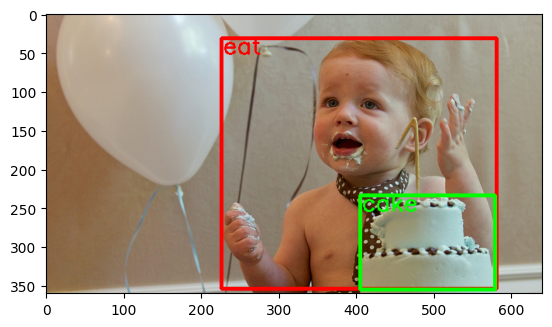

  0%|          | 3/4923 [00:00<03:10, 25.78it/s]


In [161]:
to_tsv("val")

In [ ]:
to_tsv("test")

In [ ]:
to_tsv()